# XGBoost Regression Method (House price Prediction)

## Data Preprocessing

In [5]:
import pandas as pd
import numpy as np
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv("/home/imman/Documents/Imman/Rough Draft/Resources/housing.csv",header=None,delimiter=r"\s+",names=column_names)

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [7]:
df.shape

(506, 14)

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Fixing Nan Values

In [28]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### FInding Corelation

<AxesSubplot:>

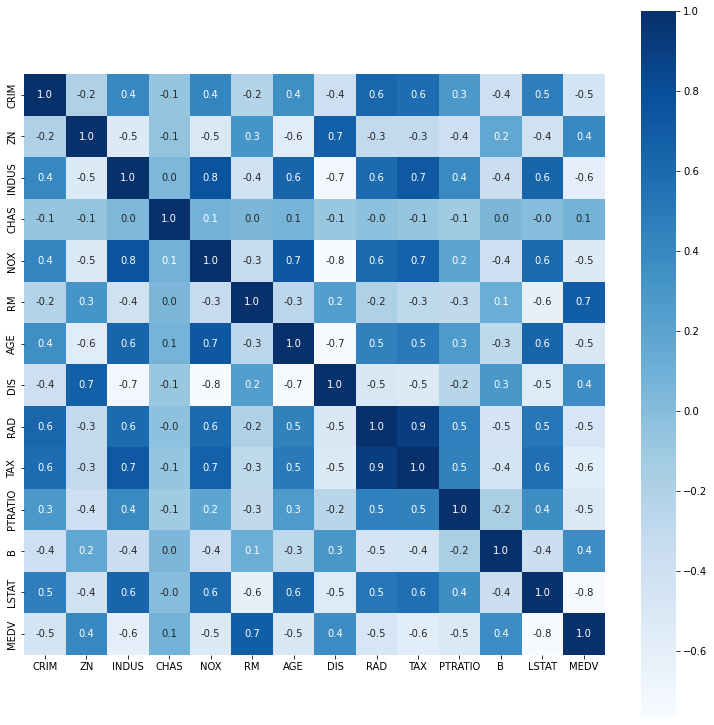

In [39]:
#Undersanding the correlation between various features
#    1)Positive Correlation & Negative Correlation
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df.corr()
plt.figure(figsize=(13,13))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,cmap='Blues')

## Regressor Model Training

### Splitting The Data

In [41]:
x= df.drop(["MEDV"],axis=1)
y = df["MEDV"]


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [47]:
print(x.shape,x_train.shape,x_test.shape)

(490, 13) (392, 13) (98, 13)


#### XGBOOST Regressor

In [51]:
from xgboost import XGBRegressor

model = XGBRegressor()

In [52]:
# Training the model with x train
model.fit(x_train,y_train)

/home/imman/.local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

#### Evaluation

##### Prediction on training Data

In [54]:

training_data_prediction  = model.predict(x_train)

/home/imman/.local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


#### R Suared Error

In [56]:
from sklearn import metrics
score_1 =  metrics.r2_score(y_train,training_data_prediction)

In [60]:
print("R squred errror :",score_1)

R squred errror : 0.9999954508204164


#### Mean Absolute Error

In [61]:
score_2 = metrics.mean_absolute_error(y_train,training_data_prediction)
print("Mean Absolute Error :",score_2)

Mean Absolute Error : 0.012193128770711454


#### Prediction on test Data

In [62]:

test_data_prediction  = model.predict(x_test)

score_1 = metrics.r2_score(y_test,test_data_prediction)
print("R Squared Error :",score_1)
score_2 = metrics.mean_absolute_error(y_test,test_data_prediction)
print("Mean Absolute Error :",score_2)

R Squared Error : 0.8806555492036101
Mean Absolute Error : 1.9302007733559121


/home/imman/.local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


### Visualizing the Actual & Predicted Prizes

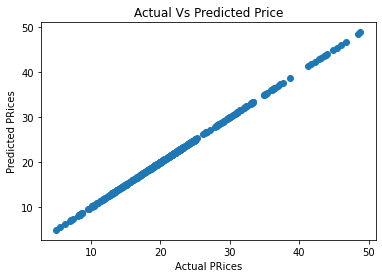

In [63]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual PRices")
plt.ylabel("Predicted PRices")
plt.title("Actual Vs Predicted Price")
plt.show()
